In [ ]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from collections import Counter
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [17]:
# שלב 1: קריאת הקובץ
file_path = "/content/drive/MyDrive/information_retrieval/Ex2/IR-files/doc2vec/doc2vec_vectors.csv"
data = pd.read_csv(file_path)

# בדיקה והצגה של הנתונים
print(data.head())
print()
print(data.info())
print()

# המרת עמודות הממדים (Dim0-Dim299) למטריצה
try:
    combined_matrix = data.loc[:, "Dim0":"Dim299"].to_numpy()  # כל העמודות מדימנסיה 0 עד 299
    print(f"Combined matrix shape: {combined_matrix.shape}")

    # שמירת עמודת Sheet כעמודת מטרה
    target_column = data['Sheet'].values
    print(f"Target column shape: {target_column.shape}")
except Exception as e:
    print(f"Error during conversion: {e}")


  Sheet  RowIndex      Dim0      Dim1      Dim2      Dim3      Dim4      Dim5  \
0   A-J         0 -0.323680  0.536064 -0.057541 -0.086456 -0.131206 -0.565315   
1   A-J         1 -0.145474  0.580617  0.055538 -0.136570 -0.058198 -0.529168   
2   A-J         2 -0.152601  0.434339  0.476579  0.219742  0.206865 -0.808800   
3   A-J         3 -0.612203  0.287306  0.622638  0.347806  0.310982 -0.528447   
4   A-J         4 -0.418779  0.231471  0.634521  0.376488  0.096662 -0.396122   

       Dim6      Dim7  ...    Dim290    Dim291    Dim292    Dim293    Dim294  \
0  0.091184  0.368373  ... -0.037265  0.056639  0.215756 -0.263049 -0.204844   
1  0.381029  0.835640  ... -0.481531  0.365477 -0.074856 -0.033853 -0.164452   
2  0.463602  0.788595  ...  0.038521  0.135275  0.485610  0.053291 -0.023656   
3  0.356173  0.113392  ... -0.246450  0.215634  0.300776 -0.041372  0.184252   
4  0.530038  0.292624  ... -0.199178  0.173679  0.205028  0.295934  0.149091   

     Dim295    Dim296    Dim297 

In [ ]:
print(f"Example vector: {target_column}")  # הדפסת דוגמה לווקטור

print(f"Example vector: {combined_matrix[0]}")  # הדפסת דוגמה לווקטור

Example vector: ['A-J' 'A-J' 'A-J' ... 'NY-T' 'NY-T' 'NY-T']
Example vector: [ 3.34896300e-02  8.91708000e-02  5.79028350e-02 -1.14865900e-03
 -2.72402910e-02  1.57380920e-02  1.83339300e-02 -5.62033430e-02
  3.03099170e-02 -5.43494040e-02 -9.04105600e-02  1.13612950e-01
 -7.47492900e-02  3.14820150e-02  6.91437200e-02 -1.75183170e-02
 -1.29257930e-01  6.31025700e-02 -2.05827950e-02 -1.17039345e-02
  4.45724740e-03  5.33533400e-02  5.45306730e-02  1.64323860e-02
 -7.31971300e-02  3.06123010e-02  6.35258340e-03  1.17905075e-02
  7.92724900e-02 -1.80930720e-02  1.64966470e-03  1.70216710e-02
 -4.78134700e-02 -5.42987770e-02 -5.72150900e-02  1.09432200e-01
  1.06778430e-02  2.29898130e-02  1.21497740e-02 -3.39682420e-03
  9.94206440e-02 -4.43093600e-02 -2.91571780e-02 -2.60810760e-02
  3.30319000e-02  1.98463720e-02 -3.92828250e-02  3.32154400e-03
  2.19048000e-02 -6.97725800e-02  3.61134750e-02 -4.25591130e-02
  3.38936300e-02 -6.14624170e-02 -3.98495500e-02  2.15549040e-02
  3.69400830e

In [ ]:
# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(combined_matrix)

# Silhouette Score
sil_score = silhouette_score(combined_matrix, kmeans_labels, metric='cosine')
print(f"Silhouette Score (K-Means): {sil_score}")

print(f"K-Means labels: {kmeans_labels}")

print(Counter(kmeans_labels))

Silhouette Score (K-Means): 0.27647567973050663
K-Means labels: [2 3 0 ... 1 1 1]
Counter({0: 756, 3: 606, 1: 544, 2: 440})


In [ ]:
# חישוב מטריצת מרחק (cosine)
distance_matrix = squareform(pdist(combined_matrix, metric='cosine'))

# חישוב MST (Minimum Spanning Tree) לצורך חישוב epsilon
mst = minimum_spanning_tree(distance_matrix).toarray()
epsilon = mst.max() if mst.max() > 0 else 0.5

print(f"Epsilon for DBSCAN: {epsilon}")

# DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=25, metric='cosine')
dbscan_labels = dbscan.fit_predict(combined_matrix)

# הצגת תוצאות DBSCAN
print(f"DBSCAN labels: {dbscan_labels}")

print(Counter(dbscan_labels))

Epsilon for DBSCAN: 0.7918655143640432
DBSCAN labels: [0 0 0 ... 0 0 0]
Counter({0: 2346})


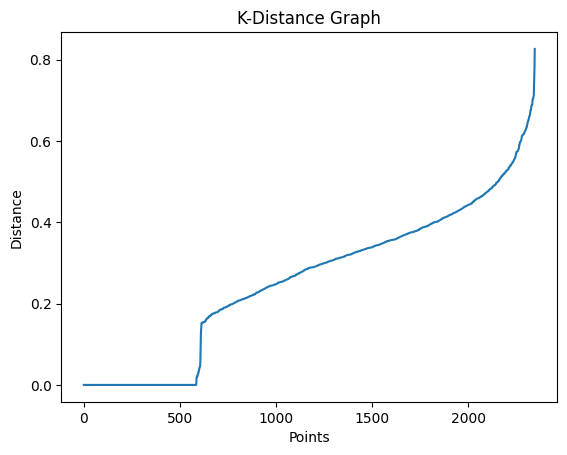

In [ ]:
k = 5
nn = NearestNeighbors(n_neighbors=k, metric='cosine')
nn.fit(combined_matrix)
distances, indices = nn.kneighbors(combined_matrix)

# מיון המרחקים והצגה בגרף
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()


In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=12, metric='cosine') # קביעת האפסילון ע"פ הגרף שקיבלנו
dbscan_labels = dbscan.fit_predict(combined_matrix)

# הצגת תוצאות DBSCAN
print(f"DBSCAN labels: {dbscan_labels}")
print(Counter(dbscan_labels))

DBSCAN labels: [ 2 -1  2 ...  0  0  0]
Counter({2: 1060, -1: 687, 0: 544, 3: 34, 1: 21})


In [ ]:
# Mixture of Gaussians ע"י התפלגות גאוסיאנית
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(combined_matrix)

print(f"GMM labels: {gmm_labels}")
print(Counter(gmm_labels))

GMM labels: [2 3 0 ... 1 1 1]
Counter({0: 755, 3: 607, 1: 544, 2: 440})


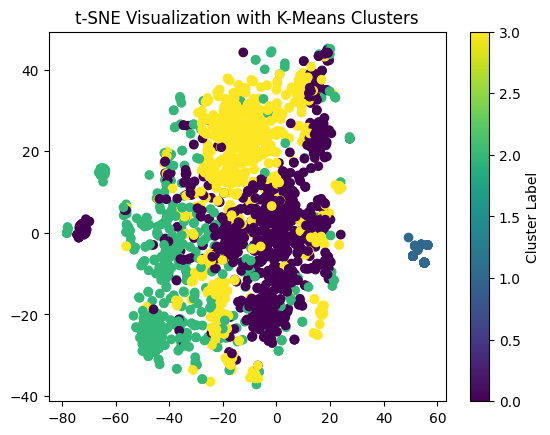

In [ ]:
# tsne הורדה ל2 ממדים כדי לאפשר הצגה בגרף, תוך שמירה על יחסי הדמיון
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(combined_matrix)

# הצגת תוצאות ויזואליות עם K-Means
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("t-SNE Visualization with K-Means Clusters")
plt.colorbar(label='Cluster Label')
plt.show()

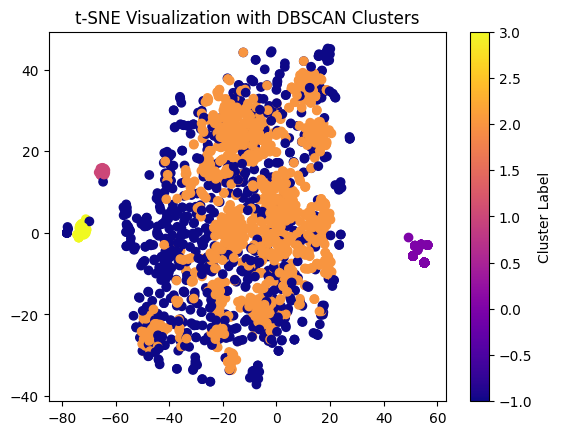

In [ ]:
# תוצאות DBSCAN
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='plasma')
plt.title("t-SNE Visualization with DBSCAN Clusters")
plt.colorbar(label='Cluster Label')
plt.show()

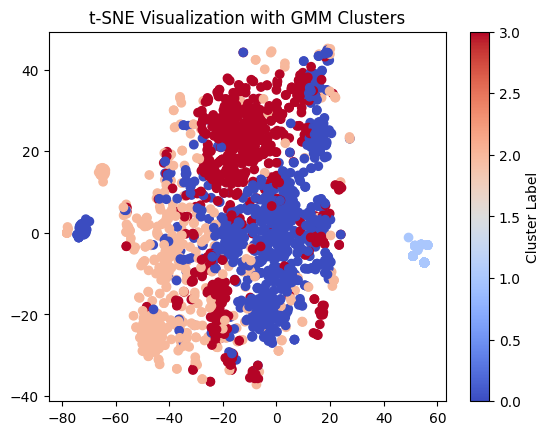

In [ ]:
# תוצאות GMM
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm_labels, cmap='coolwarm')
plt.title("t-SNE Visualization with GMM Clusters")
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
# המרה של target_column לערכים מספריים באמצעות LabelEncoder
label_encoder = LabelEncoder()
numeric_target = label_encoder.fit_transform(target_column)  # ממיר מחרוזות למספרים

# חישוב המדדים עבור K-Means
print("Evaluation Metrics for K-Means:")
print(f"Precision: {precision_score(numeric_target, kmeans_labels, average='weighted')}")
print(f"Recall: {recall_score(numeric_target, kmeans_labels, average='weighted')}")
print(f"F1 Score: {f1_score(numeric_target, kmeans_labels, average='weighted')}")
print(f"Accuracy: {accuracy_score(numeric_target, kmeans_labels)}")
print()

# חישוב המדדים עבור DBSCAN
print("Evaluation Metrics for DBSCAN:")
print(f"Precision: {precision_score(numeric_target, dbscan_labels, average='weighted', zero_division=1)}") # הוספת הזירו דיבישין = 1 כדי להתמודד עם קבוצת הרעשים שנוצרת בדיביסקאן
print(f"Recall: {recall_score(numeric_target, dbscan_labels, average='weighted', zero_division=1)}")
print(f"F1 Score: {f1_score(numeric_target, dbscan_labels, average='weighted', zero_division=1)}")
print(f"Accuracy: {accuracy_score(numeric_target, dbscan_labels)}")
print()

# חישוב המדדים עבור GMM
print("Evaluation Metrics for GMM:")
print(f"Precision: {precision_score(numeric_target, gmm_labels, average='weighted')}")
print(f"Recall: {recall_score(numeric_target, gmm_labels, average='weighted')}")
print(f"F1 Score: {f1_score(numeric_target, gmm_labels, average='weighted')}")
print(f"Accuracy: {accuracy_score(numeric_target, gmm_labels)}")

Evaluation Metrics for K-Means:
Precision: 0.17005298421897563
Recall: 0.1649616368286445
F1 Score: 0.16502785514266757
Accuracy: 0.1649616368286445

Evaluation Metrics for DBSCAN:
Precision: 0.1387815843294322
Recall: 0.1918158567774936
F1 Score: 0.15699591772056473
Accuracy: 0.1918158567774936

Evaluation Metrics for GMM:
Precision: 0.17007553682156978
Recall: 0.1649616368286445
F1 Score: 0.16504824730027223
Accuracy: 0.1649616368286445


# **עד כאן חלק א של תרגיל 2**

In [ ]:
def load_and_preprocess_data(file_path):
    # המרת עמודות הממדים (Dim0-Dim299) למטריצה
    try:
        combined_matrix = data.loc[:, "Dim0":"Dim299"].to_numpy()  # כל העמודות מדימנסיה 0 עד 299
        print(f"Combined matrix shape: {combined_matrix.shape}")

        # שמירת עמודת Sheet כעמודת מטרה
        target_column = data['Sheet'].values
        print(f"Target column shape: {target_column.shape}")
    except Exception as e:
        print(f"Error during conversion: {e}")

    return combined_matrix, target_column

In [ ]:
def train_and_evaluate_classical_models(X_train, X_test, y_train, y_test):
    """Trains and evaluates NB, SVM, LoR, RF models."""
    results = {}
    models = {
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(kernel='linear', random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    }
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[model_name] = classification_report(y_test, y_pred, output_dict=True)
        print(f"Results for {model_name}:\n", classification_report(y_test, y_pred))
    return results

In [ ]:
def train_and_evaluate_ann(X_train, X_test, y_train, y_test, num_classes):
    """Trains and evaluates an Artificial Neural Network."""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
        ModelCheckpoint("best_ann_model.keras", save_best_only=True)
    ]

    history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, callbacks=callbacks)

    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"ANN Test Accuracy: {accuracy}")

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title("ANN Training")
    plt.show()

    return {'accuracy': accuracy, 'loss': loss}

In [20]:
def main(file_path):
    print("Loading data...")
    combined_matrix, target_column = load_and_preprocess_data(file_path)

    # המרה של target_column לערכים מספריים באמצעות LabelEncoder
    label_encoder = LabelEncoder()
    numeric_target = label_encoder.fit_transform(target_column)  # ממיר מחרוזות למספרים

    print("Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(combined_matrix, numeric_target, test_size=0.2, random_state=42)

    print("Training classical models...")
    classical_results = train_and_evaluate_classical_models(X_train, X_test, y_train, y_test)

    print("Training ANN...")
    print(y_test)
    num_classes = len(np.unique(target_column))
    ann_results = train_and_evaluate_ann(X_train, X_test, y_train, y_test, num_classes)

    results = {'Classical Models': classical_results, 'ANN': ann_results}
    with open("results.txt", "w") as f:
        for section, section_results in results.items():
            f.write(f"{section} Results:\n")
            for model_name, metrics in section_results.items():
                f.write(f"{model_name}:\n{metrics}\n")
            f.write("\n")
    print("All results saved to 'results.txt'.")

Loading data...
Combined matrix shape: (2346, 300)
Target column shape: (2346,)
Splitting data...
Training classical models...
Training Naive Bayes...
Results for Naive Bayes:
               precision    recall  f1-score   support

           0       0.61      0.95      0.74       129
           1       0.65      0.97      0.78       100
           2       0.98      0.89      0.93       118
           3       0.40      0.05      0.09       123

    accuracy                           0.70       470
   macro avg       0.66      0.71      0.64       470
weighted avg       0.66      0.70      0.63       470

Training SVM...
Results for SVM:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       129
           1       0.92      0.94      0.93       100
           2       1.00      0.90      0.95       118
           3       0.84      0.89      0.87       123

    accuracy                           0.90       470
   macro avg       0.91     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3901 - loss: 1.2063 - val_accuracy: 0.7234 - val_loss: 0.7068
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7236 - loss: 0.6693 - val_accuracy: 0.8883 - val_loss: 0.3632
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8729 - loss: 0.3809 - val_accuracy: 0.9362 - val_loss: 0.2419
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9312 - loss: 0.2604 - val_accuracy: 0.9255 - val_loss: 0.2054
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9390 - loss: 0.1975 - val_accuracy: 0.9574 - val_loss: 0.1669
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9788 - loss: 0.1202 - val_accuracy: 0.9521 - val_loss: 0.1717
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9851 - loss: 0.0894 - val_accuracy: 0.9468 - val_loss: 0.1701
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9830 - loss: 0.0847 - val_accuracy: 0.9734 - val_loss: 0.1727
Ep

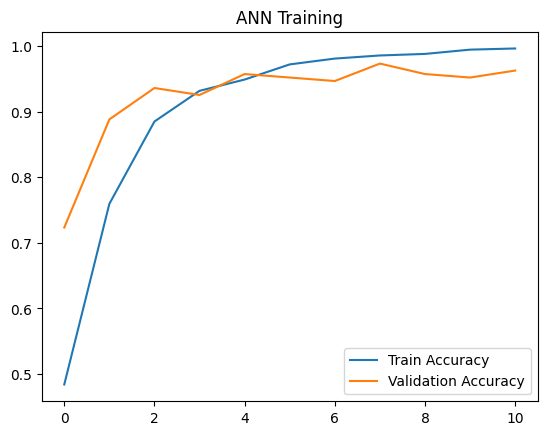

All results saved to 'results.txt'.


In [21]:
main("/content/drive/MyDrive/information_retrieval/Ex2/IR-files/doc2vec/doc2vec_vectors.csv")

In [ ]:
print(dict(enumerate(label_encoder.classes_)))

{0: 'A-J', 1: 'BBC', 2: 'J-P', 3: 'NY-T'}
